In [56]:
%matplotlib notebook
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

In [57]:
df = pd.read_csv("data/boston.csv", header=0)
print(df.describe())

             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

数据归一化

In [58]:
print(df)

         CRIM   ZN   INDUS   CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0     0.00632  18.0    2.31     0  0.538  6.575   65.2  4.0900    1  296   
1     0.02731   0.0    7.07     0  0.469  6.421   78.9  4.9671    2  242   
2     0.02729   0.0    7.07     0  0.469  7.185   61.1  4.9671    2  242   
3     0.03237   0.0    2.18     0  0.458  6.998   45.8  6.0622    3  222   
4     0.06905   0.0    2.18     0  0.458  7.147   54.2  6.0622    3  222   
5     0.02985   0.0    2.18     0  0.458  6.430   58.7  6.0622    3  222   
6     0.08829  12.5    7.87     0  0.524  6.012   66.6  5.5605    5  311   
7     0.14455  12.5    7.87     0  0.524  6.172   96.1  5.9505    5  311   
8     0.21124  12.5    7.87     0  0.524  5.631  100.0  6.0821    5  311   
9     0.17004  12.5    7.87     0  0.524  6.004   85.9  6.5921    5  311   
10    0.22489  12.5    7.87     0  0.524  6.377   94.3  6.3467    5  311   
11    0.11747  12.5    7.87     0  0.524  6.009   82.9  6.2267    5  311   
12    0.0937

In [59]:
df = df.values
print(df)

[[  6.32000000e-03   1.80000000e+01   2.31000000e+00 ...,   1.53000000e+01
    4.98000000e+00   2.40000000e+01]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    9.14000000e+00   2.16000000e+01]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    4.03000000e+00   3.47000000e+01]
 ..., 
 [  6.07600000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    5.64000000e+00   2.39000000e+01]
 [  1.09590000e-01   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    6.48000000e+00   2.20000000e+01]
 [  4.74100000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    7.88000000e+00   1.19000000e+01]]


In [60]:
df = np.array(df)
print(df)


[[  6.32000000e-03   1.80000000e+01   2.31000000e+00 ...,   1.53000000e+01
    4.98000000e+00   2.40000000e+01]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    9.14000000e+00   2.16000000e+01]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    4.03000000e+00   3.47000000e+01]
 ..., 
 [  6.07600000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    5.64000000e+00   2.39000000e+01]
 [  1.09590000e-01   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    6.48000000e+00   2.20000000e+01]
 [  4.74100000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    7.88000000e+00   1.19000000e+01]]


In [61]:
for i in range(12):
    df[:,i] = df[:,i] / (df[:,i].max() - df[:,i].min())

In [62]:
x_data = df[:,:12]
y_data = df[:,12]

In [63]:
print(x_data,'x-data.shape:',x_data.shape)

[[  7.10352762e-05   1.80000000e-01   8.46774194e-02 ...,   5.64885496e-01
    1.62765957e+00   1.37417219e-01]
 [  3.06957815e-04   0.00000000e+00   2.59164223e-01 ...,   4.61832061e-01
    1.89361702e+00   2.52207506e-01]
 [  3.06733020e-04   0.00000000e+00   2.59164223e-01 ...,   4.61832061e-01
    1.89361702e+00   1.11203091e-01]
 ..., 
 [  6.82927750e-04   0.00000000e+00   4.37316716e-01 ...,   5.20992366e-01
    2.23404255e+00   1.55629139e-01]
 [  1.23176518e-03   0.00000000e+00   4.37316716e-01 ...,   5.20992366e-01
    2.23404255e+00   1.78807947e-01]
 [  5.32876969e-04   0.00000000e+00   4.37316716e-01 ...,   5.20992366e-01
    2.23404255e+00   2.17439294e-01]] x-data.shape: (506, 12)


In [64]:
print(y_data,'y-data.shape:',y_data.shape)

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4  15.6
  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   15.6
  13.1  41.3  24.3  23.3  27.   50.   50.   50.   2

In [65]:
x = tf.placeholder(tf.float32,[None,12],name="X")
y = tf.placeholder(tf.float32,[None,1],name="Y")

In [66]:
with tf.name_scope("Model"):
    w = tf.Variable(tf.random_normal([12,1],stddev=0.01),name="W")
    b = tf.Variable(1.,name="b")
    
    def model(x,w,b):
        return tf.matmul(x, w) + b
    
    pred = model(x,w,b)
    

In [67]:
train_epochs = 100
learning_rate  =0.01

In [68]:
with tf.name_scope("LossFunction"):
    loss_function=tf.reduce_mean(tf.square(y-pred))

In [69]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

全局数据初始化

In [70]:
sess = tf.Session()
init = tf.global_variables_initializer()

为可视化准备数据

In [71]:
logdir = "logs"
sum_loss_op = tf.summary.scalar("loss",loss_function)
merged = tf.summary.merge_all()

In [72]:
sess.run(init)

In [74]:
writer = tf.summary.FileWriter(logdir,sess.graph)

In [75]:
step = 0
loss_list = []
for epoch in range(train_epochs):
    loss_sum = 0
    for xs, ys in zip(x_data, y_data):
        xs = xs.reshape(1,12)
        ys = ys.reshape(1,1)
        #print(xs,ys)
        _, summary_str,loss = sess.run([optimizer,sum_loss_op,loss_function],feed_dict={x:xs, y:ys})
        writer.add_summary(summary_str,epoch)
        step = step + 1
        if step % 100 == 0:
            pass#print("epoch:",epoch,"step:",step,"loss:",loss)
        loss_sum += loss
        
    shuffle(x_data, y_data)
    b0temp = b.eval(session=sess)
    w0temp = w.eval(session=sess)
    loss_avg = loss_sum / len(y_data)
    loss_list.append(loss_avg)
    
    print("epoch:",epoch,"loss:",loss_avg,"b:",b0temp,"w.shape:",w0temp.shape)
    

epoch: 0 loss: 44.3327992529 b: 3.6071 w.shape: (12, 1)
epoch: 1 loss: 32.0378128428 b: 3.99537 w.shape: (12, 1)
epoch: 2 loss: 27.3401532271 b: 4.27646 w.shape: (12, 1)
epoch: 3 loss: 24.6721592264 b: 4.49791 w.shape: (12, 1)
epoch: 4 loss: 23.1042882233 b: 4.6868 w.shape: (12, 1)
epoch: 5 loss: 22.1598612426 b: 4.85856 w.shape: (12, 1)
epoch: 6 loss: 21.5797443579 b: 5.02198 w.shape: (12, 1)
epoch: 7 loss: 21.216742979 b: 5.18195 w.shape: (12, 1)
epoch: 8 loss: 20.984560663 b: 5.34123 w.shape: (12, 1)
epoch: 9 loss: 20.8315623597 b: 5.50125 w.shape: (12, 1)
epoch: 10 loss: 20.726483257 b: 5.66272 w.shape: (12, 1)
epoch: 11 loss: 20.6502671543 b: 5.82592 w.shape: (12, 1)
epoch: 12 loss: 20.5913267318 b: 5.99091 w.shape: (12, 1)
epoch: 13 loss: 20.5426419877 b: 6.15758 w.shape: (12, 1)
epoch: 14 loss: 20.5000163785 b: 6.3258 w.shape: (12, 1)
epoch: 15 loss: 20.4609723665 b: 6.49536 w.shape: (12, 1)
epoch: 16 loss: 20.4241036149 b: 6.66607 w.shape: (12, 1)
epoch: 17 loss: 20.3886207544 

[44.332799252876875, 32.037812842804399, 27.34015322705379, 24.672159226383776, 23.104288223339427, 22.159861242606357, 21.579744357886128, 21.216742978958202, 20.984560663041616, 20.831562359679573, 20.726483256976202, 20.650267154325352, 20.591326731844802, 20.542641987699515, 20.5000163785399, 20.460972366535763, 20.424103614907516, 20.388620754432864, 20.354117149025654, 20.320414955063342, 20.287430016076943, 20.255165975217501, 20.223649384188509, 20.192904072338308, 20.162944671458909, 20.133805930047931, 20.105506696397786, 20.078034849461151, 20.051401994393139, 20.025589080018374, 20.000584962948736, 19.976372585584464, 19.952930701233313, 19.930235405829549, 19.908261831531568, 19.886974384737453, 19.866359081119818, 19.846385383527785, 19.827032927670388, 19.808266137460162, 19.7900683404627, 19.7724081960083, 19.755278568952036, 19.738646157852159, 19.72249595067986, 19.70679867107749, 19.691543727807016, 19.676714250381799, 19.662286695025859, 19.648241966003056, 19.63457

<IPython.core.display.Javascript object>


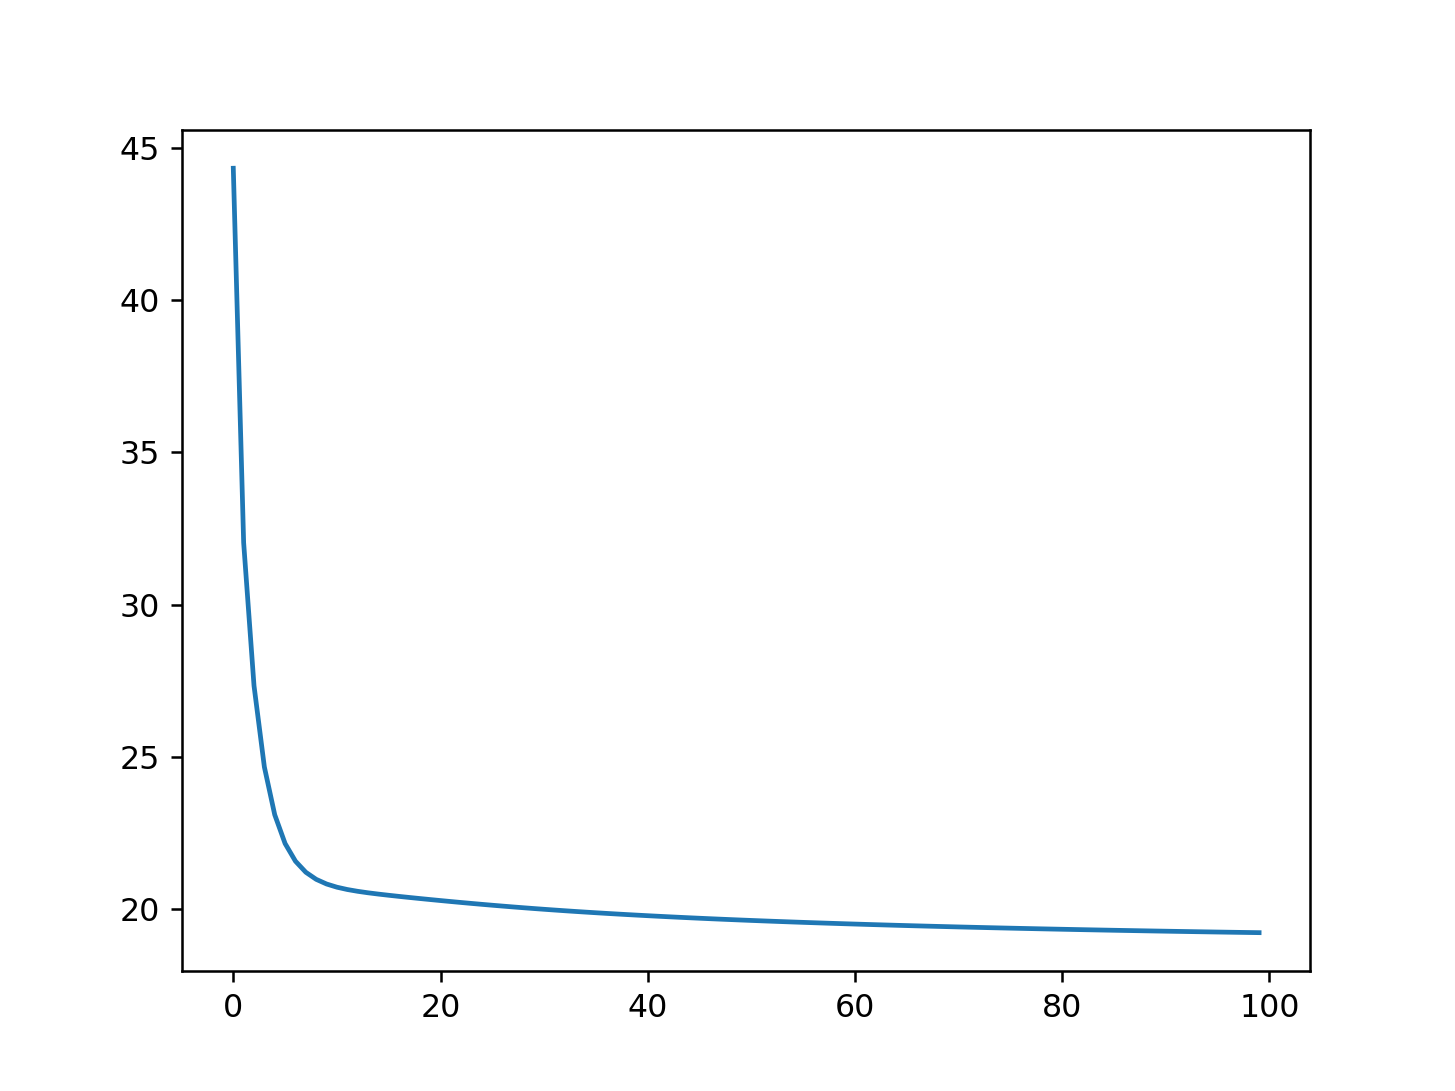

In [76]:
print(loss_list)
plt.plot(loss_list)